Analisis Entos - Estados Unidos 

In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare,pearsonr

In [64]:
# Read File 
df = pd.read_csv("visits_year_to_date.csv")

In [65]:
# Cambiar Avarage Duration 
def filter_avg_duration(x):
    if type(x) == float:
        return 0

    x = x.strip("s")
    value = x.split("m")

    if(len(value) > 1):
        minute = int(value[0])
        second = float(value[1]) / 60
        time = minute + second
    else:
        time = float(value[0]) / 60
    
    return time

df.avg_duration = df.avg_duration.apply(filter_avg_duration)

In [66]:
# Cambiar Month a Month Name 
month_columns = ["Januray","February","March","April","May","June","July","Agost","September","October","November"]
df.month = month_columns

In [67]:
# Meses con ventas y sus estadisticas
df_meses_ventas = df[df.total_orders_placed >= 1].reset_index(drop = True)

print(df_meses_ventas)

      month  total_visitors  total_sessions  avg_duration  total_bounce_rate  \
0   Januray            3891            4547      1.406851            0.60501   
1  February            1527            1739      1.340914            0.58654   
2     April            1017            1147      1.320110            0.67044   
3       May             894             998      1.476219            0.67134   
4      July             574             649      1.916692            0.60708   

   total_carts  total_checkouts  total_conversion  total_orders_placed  \
0           21                7           0.00021                    1   
1            8                5           0.00057                    1   
2           11                2           0.00087                    1   
3           13                3           0.00100                    1   
4            9                1           0.00154                    1   

   total_pageviews  
0            11201  
1             4962  
2          

<BarContainer object of 5 artists>

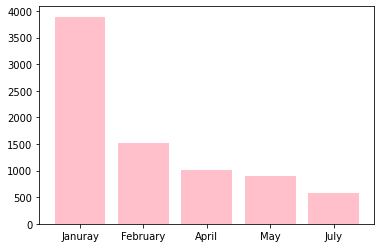

In [68]:
# Mesese con ventas y con mas visitas
plt.bar(df_meses_ventas.month, df_meses_ventas.total_visitors, color = "pink")

<BarContainer object of 5 artists>

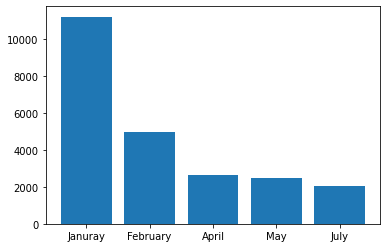

In [69]:
# Meses con con ventas y total vistas de pagina 
plt.clf()
plt.bar(df_meses_ventas.month,df_meses_ventas.total_pageviews)

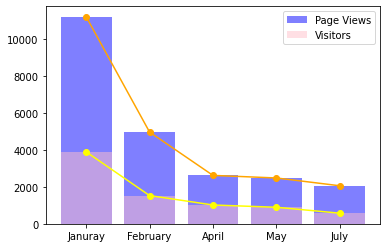

In [70]:
# Comparasion de visitantes vs total de vistas a pagina con ventas
plt.clf()
plt.bar(df_meses_ventas.month,df_meses_ventas.total_pageviews,alpha = 0.5, label = "Page Views", color = "blue")
plt.bar(df_meses_ventas.month, df_meses_ventas.total_visitors, alpha = 0.5, label = "Visitors", color = "pink")
plt.plot(df_meses_ventas.month, df_meses_ventas.total_pageviews, '-o', color='orange')
plt.plot(df_meses_ventas.month, df_meses_ventas.total_visitors, '-o', color = "yellow")
plt.legend()
plt.show()

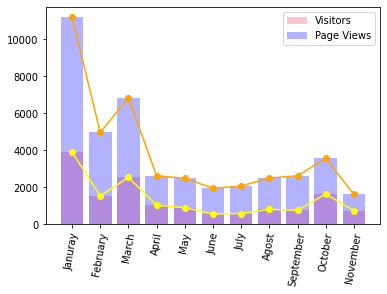

In [71]:
# Comparasion visitantes vs pageviews cada mes sin ventas
plt.clf()
plt.bar(df.month, df.total_visitors, alpha = 0.9, color = "pink", label = "Visitors")
plt.bar(df.month, df.total_pageviews, alpha = 0.3, color = "blue", label = "Page Views")
plt.plot(df.month, df.total_pageviews, '-o', color='orange')
plt.plot(df.month, df.total_visitors, '-o', color = "yellow")
plt.xticks(rotation = 80)
plt.legend()
plt.show()

In [72]:
# Porcentaje de caida 
quarters_values = []
quarters_names = ["1T","2T","3T","4T"]

first_quarter_pageviews = df.total_pageviews[:2].mean()
quarters_values.append(first_quarter_pageviews)

second_quarter_pageviews = df.total_pageviews[3:5].mean()
quarters_values.append(second_quarter_pageviews)

third_quarter_pageviews = df.total_pageviews[6:8].mean()
quarters_values.append(third_quarter_pageviews)

fourth_quarter_pageviews = df.total_pageviews[9:].mean()
quarters_values.append(fourth_quarter_pageviews)


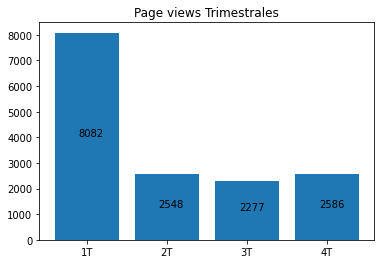

In [73]:
# Barplot Trimestres 
plt.clf()
plt.bar(quarters_names,quarters_values)
for i in range(0,4,1):
    plt.text(i -.1,quarters_values[i]/2, str(round(quarters_values[i])))
plt.title("Page views Trimestrales")
plt.show()

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

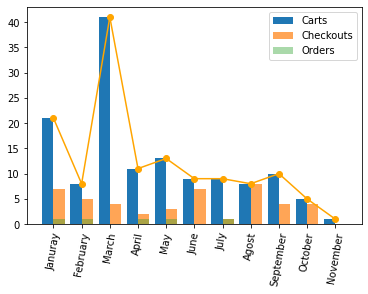

In [77]:
# Bar Plot Carritos - Checkouts - Pagos
months = df.month
carts = df.total_carts
checkout = df.total_checkouts
orders = df.total_orders_placed

x_axis = np.arange(len(months))
plt.bar(x_axis - 0.2, carts, 0.4, label ="Carts")
plt.bar(x_axis + 0.2, checkout,0.4, label = "Checkouts",alpha = 0.7)
plt.bar(x_axis + 0.2, orders, 0.4, label = "Orders",alpha = 0.4)
plt.plot(months,carts,'-o', color='orange')

plt.xticks(x_axis,months,rotation = 80)
plt.legend()
plt.bar

<Figure size 432x288 with 0 Axes>

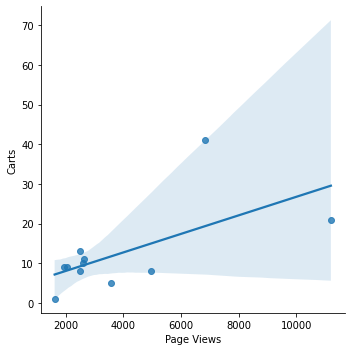

0.6278369327199753


In [75]:
# Scatter Plot de Carts vs Total Page Views
plt.clf()
sns.lmplot(data = df, x = "total_pageviews", y = "total_carts")
plt.xlabel("Page Views")
plt.ylabel("Carts")
plt.show()

# Buscar correlacion Lineal 
correlacion, _ = pearsonr(df.total_pageviews,df.total_carts)
print(correlacion)

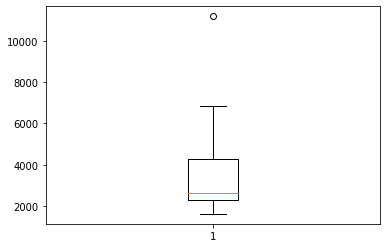

In [76]:
# Boxplot Rango de Page Views
page_views = df.total_pageviews

plt.clf()
plt.boxplot(page_views)
plt.show()